In [805]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [806]:
#read two datasets
movie = pd.read_csv('rotten_tomatoes_movies.csv')
critics = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

In [807]:
movie1 = movie[['rotten_tomatoes_link', 'movie_title', 'critics_consensus', 'genres', 
                'tomatometer_rating', 'audience_rating']].copy()

In [808]:
movie1 = movie1.dropna(subset=['tomatometer_rating', 'audience_rating'])
movie1 = movie1.reset_index(drop=True)

In [809]:
tomato_mean = movie1['tomatometer_rating'].mean()
audience_mean = movie1['audience_rating'].mean()

In [810]:
print(tomato_mean)
print(audience_mean)

60.74504509680014
60.556385362210605


In [811]:
#create two binary columns based on the tomatomer_rating and audience_rating
movie1['tomato_binary_rating'] = np.where(movie1['tomatometer_rating']>60, '1', '0')
movie1['audience_binary_rating'] = np.where(movie1['audience_rating']>60, '1', '0')

In [812]:
print(movie1['genres'].unique())

['Action & Adventure, Comedy, Drama, Science Fiction & Fantasy' 'Comedy'
 'Comedy, Romance' ...
 'Animation, Art House & International, Drama, Science Fiction & Fantasy, Romance'
 'Art House & International, Romance'
 'Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense']


In [813]:
#print(movie1[movie1['genres'].isna()])
movie1 = movie1.dropna(subset=['genres', 'critics_consensus'])
movie1 = movie1.reset_index(drop=True)

In [814]:
print(movie1.head())

                    rotten_tomatoes_link                                        movie_title                                  critics_consensus                                             genres  tomatometer_rating  audience_rating tomato_binary_rating audience_binary_rating
0                              m/0814255  Percy Jackson & the Olympians: The Lightning T...  Though it may seem like just another Harry Pot...  Action & Adventure, Comedy, Drama, Science Fic...                49.0             53.0                    0                      0
1                              m/0878835                                        Please Give  Nicole Holofcener's newest might seem slight i...                                             Comedy                87.0             64.0                    1                      1
2                                   m/10                                                 10  Blake Edwards' bawdy comedy may not score a pe...                                 

In [815]:
#create two movie genres.
#one is made of "Horror" and "Mystery & Suspense", and one is made of "Romance", "Kids & Family", and "Comedy"
list1_of_genres = ["Horror", "Mystery & Suspense"]
movie_g1 = movie1[movie1.genres.str.contains('|'.join(list1_of_genres))]
list2_of_genres = ["Romance", "Kids & Family", "Comedy"]
movie_g2 = movie1[movie1.genres.str.contains('|'.join(list2_of_genres))]
movie_g1 = movie_g1.reset_index(drop=True)
movie_g2 = movie_g2.reset_index(drop=True)
#list_of_genres = [ "Horror", "Mystery & Suspense", "Romance", "Kids & Family", "Comedy"]
#movie_genres = movie1[movie1["genres"].isin(list_of_genres)]

In [816]:
print(movie_g1.info())
print(movie_g2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425 entries, 0 to 2424
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rotten_tomatoes_link    2425 non-null   object 
 1   movie_title             2425 non-null   object 
 2   critics_consensus       2425 non-null   object 
 3   genres                  2425 non-null   object 
 4   tomatometer_rating      2425 non-null   float64
 5   audience_rating         2425 non-null   float64
 6   tomato_binary_rating    2425 non-null   object 
 7   audience_binary_rating  2425 non-null   object 
dtypes: float64(2), object(6)
memory usage: 151.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rotten_tomatoes_link    3877 non-null   object 
 1   movie_title             3877 non-nu

In [817]:
movie_g1['genres'] = 'Horror & Suspense'
movie_g2['genres'] = 'Family Movie'
#print(movie_g1['genres'].unique())
#print(movie_g2['genres'].unique())

In [818]:
#drop duplicate rows because there are some same rotten_tomatoes_link
movie_final = pd.concat([movie_g1,movie_g2]).drop_duplicates(subset='rotten_tomatoes_link', keep="first").reset_index(drop=True)

In [819]:
print(movie_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5897 entries, 0 to 5896
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rotten_tomatoes_link    5897 non-null   object 
 1   movie_title             5897 non-null   object 
 2   critics_consensus       5897 non-null   object 
 3   genres                  5897 non-null   object 
 4   tomatometer_rating      5897 non-null   float64
 5   audience_rating         5897 non-null   float64
 6   tomato_binary_rating    5897 non-null   object 
 7   audience_binary_rating  5897 non-null   object 
dtypes: float64(2), object(6)
memory usage: 368.7+ KB
None


### second dataset

In [820]:
critics1 = critics[['rotten_tomatoes_link', 'review_content']].copy()
critics1 = critics1.dropna(subset=['review_content'])
critics1 = critics1.reset_index(drop=True)
print(critics1.info())
#print(critics1[critics1['review_content'].isna()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064211 entries, 0 to 1064210
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1064211 non-null  object
 1   review_content        1064211 non-null  object
dtypes: object(2)
memory usage: 16.2+ MB
None


In [821]:
#select critics review which are for the selected movies in the movie_final dataset
movie_link_list = movie_final.rotten_tomatoes_link.values.tolist()
critics1 = critics1[critics1['rotten_tomatoes_link'].isin(movie_link_list)]
print(critics1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602583 entries, 0 to 1064182
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   rotten_tomatoes_link  602583 non-null  object
 1   review_content        602583 non-null  object
dtypes: object(2)
memory usage: 13.8+ MB
None


In [822]:
mapping = dict(movie_final[['rotten_tomatoes_link', 'genres']].values)
critics1['genres'] = critics1.rotten_tomatoes_link.map(mapping)


In [823]:
horror = critics1[critics1.genres.str.contains("Horror & Suspense")].reset_index(drop=True)
family = critics1[critics1.genres.str.contains("Family Movie")].reset_index(drop=True)
#horror = horror.groupby(['rotten_tomatoes_link'])
print(horror.head())

  rotten_tomatoes_link                                     review_content             genres
0   m/1000121-39_steps                        If you haven't seen it, do.  Horror & Suspense
1   m/1000121-39_steps                 Laced with comic romantic touches.  Horror & Suspense
2   m/1000121-39_steps  For those who love a grand spy mystery, a wild...  Horror & Suspense
3   m/1000121-39_steps  If you can imagine Anatole France writing a de...  Horror & Suspense
4   m/1000121-39_steps  The 39 Steps (1935) is one of the earlier Alfr...  Horror & Suspense


In [824]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [825]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
wnl = WordNetLemmatizer()
words_list = []
movie_sentence_list = []
for i in horror['review_content'].values:
    my_list = re.findall(r"(?<![@#])\b\w+(?:'\w+)?", i)       #prevent he's or it's happens
    #my_list = [wnl.lemmatize(w)if wnl.lemmatize(w).endswith('e') else ps.stem(w) for w in my_list]                    #stemming words
    for w in my_list:
        if not w.lower() in stop_words and not w.isdigit():   #remove stop_words and digits
            words_list.append(w.lower())
            #words_list = list(set(words_list))                #remove duplicate string in a list
    movie_sentence_list.append(list(words_list))
    words_list = []
horror['words'] = movie_sentence_list
#print(horror)


In [826]:
horror1 = horror[['rotten_tomatoes_link','words']].copy()
horror1 = horror1.groupby(['rotten_tomatoes_link'], as_index = False).agg({'words': list})
print(horror1)

#print(horror1)
#df.groupby(['name', 'month'], as_index = False).agg({'text': list})

           rotten_tomatoes_link                                              words
0            m/1000121-39_steps  [[seen], [laced, comic, romantic, touches], [l...
1           m/10003276-criminal  [[got, two, half, months, crap, go, get, holid...
2     m/10004288-running_scared  [[unapologetic, face, thriller, that's, sure, ...
3        m/10004504-ultraviolet  [[ultraviolet, studied, great, interest, futur...
4            m/10004697-eternal  [[multidimensional, characterization, dialogue...
...                         ...                                                ...
2419             m/zombi_2_1979  [[horrible, acting, uneven, pacing, truly, awf...
2420          m/zombie_for_sale  [[thing, irritating, watching, film, complete,...
2421         m/zombie_strippers  [[fast, paced, silly, ought, mostly, lee, real...
2422               m/zombieland  [[killer, comedy, vicious, sense, humor, runni...
2423    m/zombieland_double_tap  [[act, giving, audience, exactly, want, still,...

[24

In [827]:
release_list = []
same_movie_words = []
for i in horror1['words'].values:
    #release_list.append(sum(i, []))
    a = sum(i, [])
    same_movie_words.append(a)
    #release_list = []

    
 

horror1['combine_words'] = same_movie_words
print(horror1)

           rotten_tomatoes_link                                              words                                      combine_words
0            m/1000121-39_steps  [[seen], [laced, comic, romantic, touches], [l...  [seen, laced, comic, romantic, touches, love, ...
1           m/10003276-criminal  [[got, two, half, months, crap, go, get, holid...  [got, two, half, months, crap, go, get, holida...
2     m/10004288-running_scared  [[unapologetic, face, thriller, that's, sure, ...  [unapologetic, face, thriller, that's, sure, t...
3        m/10004504-ultraviolet  [[ultraviolet, studied, great, interest, futur...  [ultraviolet, studied, great, interest, future...
4            m/10004697-eternal  [[multidimensional, characterization, dialogue...  [multidimensional, characterization, dialogue,...
...                         ...                                                ...                                                ...
2419             m/zombi_2_1979  [[horrible, acting, uneven, p

In [828]:
words_list = []
movie_sentence_list = []
for i in family['review_content'].values:
    my_list = re.findall(r"(?<![@#])\b\w+(?:'\w+)?", i)
    #my_list = [ps.stem(w)for w in my_list]                  #stemming words
    for w in my_list:
        if not w.lower() in stop_words and not w.isdigit(): #remove stop_words and digits
            words_list.append(w.lower())
            #words_list = list(set(words_list))              #remove duplicate string in a list
    movie_sentence_list.append(list(words_list))
    words_list = []
family['words'] = movie_sentence_list
print(family)


       rotten_tomatoes_link                                     review_content        genres                                              words
0                 m/0814255  A fantasy adventure that fuses Greek mythology...  Family Movie  [fantasy, adventure, fuses, greek, mythology, ...
1                 m/0814255  Uma Thurman as Medusa, the gorgon with a coiff...  Family Movie  [uma, thurman, medusa, gorgon, coiffure, writh...
2                 m/0814255  With a top-notch cast and dazzling special eff...  Family Movie  [top, notch, cast, dazzling, special, effects,...
3                 m/0814255  Whether audiences will get behind The Lightnin...  Family Movie  [whether, audiences, get, behind, lightning, t...
4                 m/0814255  What's really lacking in The Lightning Thief i...  Family Movie  [what's, really, lacking, lightning, thief, ge...
...                     ...                                                ...           ...                                            

In [829]:
family1 = family[['rotten_tomatoes_link', 'words']].copy()
family1 = family.groupby(['rotten_tomatoes_link'], as_index = False).agg({'words': list})
print(family1)

                       rotten_tomatoes_link                                              words
0                                 m/0814255  [[fantasy, adventure, fuses, greek, mythology,...
1                                 m/0878835  [[like, holofcener's, previous, pictures, plea...
2                                      m/10  [[known, numerical, rating, system, beautiful,...
3     m/1000079-20000_leagues_under_the_sea  [[embodiment, disney, best, family, entertainm...
4                       m/1000253-adams_rib  [[adam's, rib, gives, us, writers, performers,...
...                                     ...                                                ...
3466                            m/zookeeper  [[zookeeper, essentially, surreally, awful, ha...
3467                            m/zoolander  [[making, movie, that's, stupid, fun, must, re...
3468                          m/zoolander_2  [[like, predecessor, best, bits, sequel, isola...
3469                            m/zoom_2006  [[who

In [830]:
release_list = []
same_movie_words = []
for i in family1['words'].values:
    #release_list.append(sum(i, []))
    a = sum(i, [])
    same_movie_words.append(a)
    #release_list = []

family1['combine_words'] = same_movie_words
print(family1)

                       rotten_tomatoes_link                                              words                                      combine_words
0                                 m/0814255  [[fantasy, adventure, fuses, greek, mythology,...  [fantasy, adventure, fuses, greek, mythology, ...
1                                 m/0878835  [[like, holofcener's, previous, pictures, plea...  [like, holofcener's, previous, pictures, pleas...
2                                      m/10  [[known, numerical, rating, system, beautiful,...  [known, numerical, rating, system, beautiful, ...
3     m/1000079-20000_leagues_under_the_sea  [[embodiment, disney, best, family, entertainm...  [embodiment, disney, best, family, entertainme...
4                       m/1000253-adams_rib  [[adam's, rib, gives, us, writers, performers,...  [adam's, rib, gives, us, writers, performers, ...
...                                     ...                                                ...                              

In [831]:
horror_family = pd.concat([horror1, family1], ignore_index=True)
print(horror_family)

           rotten_tomatoes_link                                              words                                      combine_words
0            m/1000121-39_steps  [[seen], [laced, comic, romantic, touches], [l...  [seen, laced, comic, romantic, touches, love, ...
1           m/10003276-criminal  [[got, two, half, months, crap, go, get, holid...  [got, two, half, months, crap, go, get, holida...
2     m/10004288-running_scared  [[unapologetic, face, thriller, that's, sure, ...  [unapologetic, face, thriller, that's, sure, t...
3        m/10004504-ultraviolet  [[ultraviolet, studied, great, interest, futur...  [ultraviolet, studied, great, interest, future...
4            m/10004697-eternal  [[multidimensional, characterization, dialogue...  [multidimensional, characterization, dialogue,...
...                         ...                                                ...                                                ...
5890                m/zookeeper  [[zookeeper, essentially, sur

In [832]:
#remove duplicate
list1 = []
for i in horror_family['combine_words'].values:
    list1.append(list(set(i)))
horror_family['remove_duplicate_words'] = list1

mapping = dict(movie_final[['rotten_tomatoes_link', 'genres']].values)
horror_family['genres'] = horror_family.rotten_tomatoes_link.map(mapping)
print(horror_family)

           rotten_tomatoes_link                                              words                                      combine_words                             remove_duplicate_words             genres
0            m/1000121-39_steps  [[seen], [laced, comic, romantic, touches], [l...  [seen, laced, comic, romantic, touches, love, ...  [office, example, piece, characteristic, finis...  Horror & Suspense
1           m/10003276-criminal  [[got, two, half, months, crap, go, get, holid...  [got, two, half, months, crap, go, get, holida...  [diminished, looks, authoritative, americaniza...  Horror & Suspense
2     m/10004288-running_scared  [[unapologetic, face, thriller, that's, sure, ...  [unapologetic, face, thriller, that's, sure, t...  [example, looks, piece, could've, finish, subs...  Horror & Suspense
3        m/10004504-ultraviolet  [[ultraviolet, studied, great, interest, futur...  [ultraviolet, studied, great, interest, future...  [office, century's, looks, piece, flux, jargon...

## Information gain

In [833]:
#nwd
horror_family1 = horror_family[['rotten_tomatoes_link', 'remove_duplicate_words']].copy()
horror_family1 = horror_family1.explode('remove_duplicate_words')
mapping = dict(movie_final[['rotten_tomatoes_link', 'genres']].values)
horror_family1['genres'] = horror_family1.rotten_tomatoes_link.map(mapping)
print(horror_family1)

     rotten_tomatoes_link remove_duplicate_words             genres
0      m/1000121-39_steps                 office  Horror & Suspense
0      m/1000121-39_steps                example  Horror & Suspense
0      m/1000121-39_steps                  piece  Horror & Suspense
0      m/1000121-39_steps         characteristic  Horror & Suspense
0      m/1000121-39_steps                 finish  Horror & Suspense
...                   ...                    ...                ...
5894           m/zootopia              addresses       Family Movie
5894           m/zootopia                 splice       Family Movie
5894           m/zootopia                   near       Family Movie
5894           m/zootopia             polarizing       Family Movie
5894           m/zootopia                 comedy       Family Movie

[3936032 rows x 3 columns]


In [834]:
#word frequncies
#Total 5895 movies
data1 = horror_family.remove_duplicate_words.explode().dropna().value_counts()
word_frequency = data1.to_frame().reset_index()
word_frequency.rename(columns = {'index':'words', 'remove_duplicate_words':'has_freq'},
          inplace = True)
word_frequency['no_freq'] = 5895-word_frequency['has_freq']
print(word_frequency)

                  words  has_freq  no_freq
0                  film      5746      149
1                 movie      5649      246
2                   one      5554      341
3                  like      5265      630
4                  good      4980      915
...                 ...       ...      ...
101807          chattin         1     5894
101808      traumatizer         1     5894
101809       gaslighted         1     5894
101810  whannellissance         1     5894
101811        zooptopia         1     5894

[101812 rows x 3 columns]


In [835]:
data_horror = horror_family[horror_family['genres']=='Horror & Suspense'].remove_duplicate_words.explode().dropna().value_counts()
horror_word_frequency = data_horror.to_frame().reset_index()
horror_word_frequency.rename(columns = {'index':'words', 'remove_duplicate_words':'has_in'},
          inplace = True)
print(horror_word_frequency)


         words  has_in
0         film    2386
1        movie    2329
2          one    2294
3         like    2161
4         much    2046
...        ...     ...
69940     nerf       1
69941  junkets       1
69942     evel       1
69943     insi       1
69944      oxy       1

[69945 rows x 2 columns]


In [836]:
word_frequency_genres = horror_family1[['rotten_tomatoes_link', 'remove_duplicate_words', 'genres']].copy()
#print(word_frequency_genres)
mapping = dict(word_frequency[['words', 'has_freq']].values)
word_frequency_genres['has_freq'] = word_frequency_genres.remove_duplicate_words.map(mapping)
mapping1 = dict(word_frequency[['words', 'no_freq']].values)
word_frequency_genres['no_freq'] = word_frequency_genres.remove_duplicate_words.map(mapping1)
#print(word_frequency_genres)
mapping2 = dict(horror_word_frequency[['words', 'has_in']].values)
word_frequency_genres['has_in'] = word_frequency_genres.remove_duplicate_words.map(mapping2)
#print(word_frequency_genres)
word_frequency_genres['has_notin'] = word_frequency_genres['has_freq']-word_frequency_genres['has_in']
word_frequency_genres['nothas_in'] = 2424-word_frequency_genres['has_in']
word_frequency_genres['nothas_notin'] = 3471-word_frequency_genres['has_notin']
print(word_frequency_genres)

     rotten_tomatoes_link remove_duplicate_words             genres  has_freq  no_freq  has_in  has_notin  nothas_in  nothas_notin
0      m/1000121-39_steps                 office  Horror & Suspense       678     5217   250.0      428.0     2174.0        3043.0
0      m/1000121-39_steps                example  Horror & Suspense      1218     4677   561.0      657.0     1863.0        2814.0
0      m/1000121-39_steps                  piece  Horror & Suspense      2601     3294  1190.0     1411.0     1234.0        2060.0
0      m/1000121-39_steps         characteristic  Horror & Suspense        77     5818    25.0       52.0     2399.0        3419.0
0      m/1000121-39_steps                 finish  Horror & Suspense       938     4957   418.0      520.0     2006.0        2951.0
...                   ...                    ...                ...       ...      ...     ...        ...        ...           ...
5894           m/zootopia              addresses       Family Movie       118     5

In [837]:
true_p = word_frequency_genres[['rotten_tomatoes_link', 'remove_duplicate_words', 'genres', 'has_freq']].copy()
true_p['true_in'] = round(word_frequency_genres['has_in']/true_p['has_freq'],2)
true_p['true_notin'] = round(word_frequency_genres['has_notin']/true_p['has_freq'],2)
true_p['true_in'].replace(to_replace = 0, value = 1, inplace=True)
true_p['true_notin'].replace(to_replace = 0, value = 1, inplace=True)

#print(true_p)
true_p['log_true_in'] = round(np.log2(true_p['true_in']),2)
true_p['log_true_notin'] = round(np.log2(true_p['true_notin']),2)
print(true_p)
notrue_p = word_frequency_genres[['rotten_tomatoes_link', 'remove_duplicate_words', 'genres', 'no_freq']].copy()
notrue_p['notrue_in'] = round(word_frequency_genres['nothas_in']/notrue_p['no_freq'],2)
notrue_p['notrue_notin'] = round(word_frequency_genres['nothas_notin']/notrue_p['no_freq'],2)
notrue_p['notrue_in'].replace(to_replace = 0, value = 1, inplace=True)
notrue_p['notrue_notin'].replace(to_replace = 0, value = 1, inplace=True)

#print(notrue_p)
notrue_p['log_notrue_in'] = round(np.log2(notrue_p['notrue_in']),2)
notrue_p['log_notrue_notin'] = round(np.log2(notrue_p['notrue_notin']),2)
print(notrue_p)

     rotten_tomatoes_link remove_duplicate_words             genres  has_freq  true_in  true_notin  log_true_in  log_true_notin
0      m/1000121-39_steps                 office  Horror & Suspense       678     0.37        0.63        -1.43           -0.67
0      m/1000121-39_steps                example  Horror & Suspense      1218     0.46        0.54        -1.12           -0.89
0      m/1000121-39_steps                  piece  Horror & Suspense      2601     0.46        0.54        -1.12           -0.89
0      m/1000121-39_steps         characteristic  Horror & Suspense        77     0.32        0.68        -1.64           -0.56
0      m/1000121-39_steps                 finish  Horror & Suspense       938     0.45        0.55        -1.15           -0.86
...                   ...                    ...                ...       ...      ...         ...          ...             ...
5894           m/zootopia              addresses       Family Movie       118     0.35        0.65      

In [838]:
#entropy
true_entropy = true_p.copy()
true_entropy['entropy'] = (-1)*(true_entropy['true_in']*true_entropy['log_true_in']+
                            true_entropy['true_notin']*true_entropy['log_true_notin'])
true_entropy['egs'] = true_entropy['has_freq']/5895
true_entropy['egs_entropy'] = true_entropy['entropy']*true_entropy['egs']
print(true_entropy)
notrue_entropy = notrue_p.copy()
notrue_entropy['entropy'] = (-1)*(notrue_entropy['notrue_in']*notrue_entropy['log_notrue_in']+
                            notrue_entropy['notrue_notin']*notrue_entropy['log_notrue_notin'])
notrue_entropy['egs'] = notrue_entropy['no_freq']/5895
notrue_entropy['egs_entropy'] = notrue_entropy['entropy']*notrue_entropy['egs']
print(notrue_entropy)

     rotten_tomatoes_link remove_duplicate_words             genres  has_freq  true_in  true_notin  log_true_in  log_true_notin  entropy       egs  egs_entropy
0      m/1000121-39_steps                 office  Horror & Suspense       678     0.37        0.63        -1.43           -0.67   0.9512  0.115013     0.109400
0      m/1000121-39_steps                example  Horror & Suspense      1218     0.46        0.54        -1.12           -0.89   0.9958  0.206616     0.205748
0      m/1000121-39_steps                  piece  Horror & Suspense      2601     0.46        0.54        -1.12           -0.89   0.9958  0.441221     0.439368
0      m/1000121-39_steps         characteristic  Horror & Suspense        77     0.32        0.68        -1.64           -0.56   0.9056  0.013062     0.011829
0      m/1000121-39_steps                 finish  Horror & Suspense       938     0.45        0.55        -1.15           -0.86   0.9905  0.159118     0.157606
...                   ...               

In [839]:
#drop nan values in rows
true_entropy = true_entropy.dropna(axis = 0)
print(true_entropy)
notrue_entropy = notrue_entropy.dropna(axis = 0)
print(notrue_entropy)

     rotten_tomatoes_link remove_duplicate_words             genres  has_freq  true_in  true_notin  log_true_in  log_true_notin  entropy       egs  egs_entropy
0      m/1000121-39_steps                 office  Horror & Suspense       678     0.37        0.63        -1.43           -0.67   0.9512  0.115013     0.109400
0      m/1000121-39_steps                example  Horror & Suspense      1218     0.46        0.54        -1.12           -0.89   0.9958  0.206616     0.205748
0      m/1000121-39_steps                  piece  Horror & Suspense      2601     0.46        0.54        -1.12           -0.89   0.9958  0.441221     0.439368
0      m/1000121-39_steps         characteristic  Horror & Suspense        77     0.32        0.68        -1.64           -0.56   0.9056  0.013062     0.011829
0      m/1000121-39_steps                 finish  Horror & Suspense       938     0.45        0.55        -1.15           -0.86   0.9905  0.159118     0.157606
...                   ...               

In [840]:
c_true = true_entropy[['remove_duplicate_words', 'true_in', 'true_notin']].copy()
c_true_head = c_true.head()
c_notrue = notrue_entropy[['remove_duplicate_words', 'notrue_in', 'notrue_notin']].copy()
c_notrue_head = c_notrue.head()

contingency = c_true_head.merge(c_notrue_head, on='remove_duplicate_words')

print(contingency.head)

<bound method NDFrame.head of   remove_duplicate_words  true_in  true_notin  notrue_in  notrue_notin
0                 office     0.37        0.63       0.42          0.58
1                example     0.46        0.54       0.40          0.60
2                  piece     0.46        0.54       0.37          0.63
3         characteristic     0.32        0.68       0.41          0.59
4                 finish     0.45        0.55       0.40          0.60>


In [841]:
#find duplicate
dups = true_entropy.groupby(true_entropy.columns.tolist()).size().reset_index().rename(columns={0:'count'})
# sum the final col of that table, and subtract the number of culprits:
dups['count'].sum() - dups.shape[0]

0

In [842]:
t_entropy = true_entropy[['rotten_tomatoes_link', 'remove_duplicate_words', 'genres', 'egs_entropy']].copy()
no_entropy = notrue_entropy[['rotten_tomatoes_link', 'remove_duplicate_words', 'genres', 'egs_entropy']].copy()
information_gain = pd.concat([t_entropy, no_entropy]).groupby(['rotten_tomatoes_link', 'remove_duplicate_words']).sum().reset_index()
information_gain['info_gain']= information_gain['egs_entropy']
mapping5 = dict(horror_family1[['rotten_tomatoes_link', 'genres']].values)
information_gain['genres'] = information_gain.rotten_tomatoes_link.map(mapping5)
print(information_gain)

        rotten_tomatoes_link remove_duplicate_words  egs_entropy  info_gain        genres
0                  m/0814255                    70s     0.972970   0.972970  Family Movie
1                  m/0814255                   able     0.976146   0.976146  Family Movie
2                  m/0814255                 absent     0.977300   0.977300  Family Movie
3                  m/0814255                 acting     0.974249   0.974249  Family Movie
4                  m/0814255                 action     0.958453   0.958453  Family Movie
...                      ...                    ...          ...        ...           ...
3886738           m/zootopia                  young     0.963121   0.963121  Family Movie
3886739           m/zootopia                younger     0.964994   0.964994  Family Movie
3886740           m/zootopia                  zesty     0.975890   0.975890  Family Movie
3886741           m/zootopia                  zingy     0.976056   0.976056  Family Movie
3886742   

In [843]:
info_gain_score = information_gain[['remove_duplicate_words', 'info_gain']].copy()
info_gain_score = info_gain_score.sort_values(by=['info_gain'], ascending=True)
print(info_gain_score)

        remove_duplicate_words  info_gain
1812790               thriller   0.652417
538521                thriller   0.652417
999721                thriller   0.652417
3165542               thriller   0.652417
2584270               thriller   0.652417
...                        ...        ...
2254166            entertained   0.980798
2071656            entertained   0.980798
1101035            entertained   0.980798
1658267            entertained   0.980798
1439224            entertained   0.980798

[3886743 rows x 2 columns]


In [844]:
#drop duplicate, non english words, and non meaning signs
info_gain_score_drop = info_gain_score.drop_duplicates(keep='first')
info_gain_score_drop = info_gain_score_drop[info_gain_score_drop['remove_duplicate_words'].map(lambda x: x.isascii())]
info_gain_score_drop = info_gain_score_drop[~info_gain_score_drop.remove_duplicate_words.str.contains(r'[0-9]')]
info_gain_score_drop = info_gain_score_drop[~info_gain_score_drop.remove_duplicate_words.str.contains(r'[@#&$%+-/*]')]
info_gain_score_drop['Rank'] = info_gain_score_drop['info_gain'].rank(method = 'first', ascending=True)
print(info_gain_score_drop['remove_duplicate_words'].head(10))

1812790     thriller
3065515     suspense
311582        horror
1863417       comedy
2731921     charming
3398158        sweet
2451801        funny
3453257        tense
99572      thrillers
3805304      thrills
Name: remove_duplicate_words, dtype: object


In [845]:
print(info_gain_score_drop.groupby(['info_gain']).count())

           remove_duplicate_words  Rank
info_gain                              
0.652417                        1     1
0.802118                        1     1
0.807180                        1     1
0.826192                        1     1
0.860625                        1     1
...                           ...   ...
0.980644                        1     1
0.980708                        1     1
0.980711                        1     1
0.980751                        1     1
0.980798                        1     1

[6750 rows x 2 columns]


In [846]:
#check if any row is duplicate
dups = info_gain_score_drop.groupby(info_gain_score_drop.columns.tolist()).size().reset_index().rename(columns={0:'count'})
dups['count'].sum() - dups.shape[0]

0

In [847]:
two_terms = info_gain_score_drop.head(200)
four_terms = info_gain_score_drop.head(400)
print(two_terms)
print(four_terms)

        remove_duplicate_words  info_gain   Rank
1812790               thriller   0.652417    1.0
3065515               suspense   0.802118    2.0
311582                  horror   0.807180    3.0
1863417                 comedy   0.826192    4.0
2731921               charming   0.860625    5.0
3398158                  sweet   0.865021    6.0
2451801                  funny   0.872437    7.0
3453257                  tense   0.872651    8.0
99572                thrillers   0.874330    9.0
3805304                thrills   0.875128   10.0
95354                  tension   0.877587   11.0
3299866                   gore   0.880443   12.0
2960656            suspenseful   0.886235   13.0
1896952                 scares   0.890795   14.0
1794298                  jokes   0.893227   15.0
157328                   scary   0.897090   16.0
387741                comedies   0.897627   17.0
3635156                  charm   0.899991   18.0
3713174               chilling   0.901090   19.0
1456366          psy

In [848]:
two_list= list(two_terms["remove_duplicate_words"])
four_list = list(four_terms["remove_duplicate_words"])
print(len(two_list))
print(two_list)

200
['thriller', 'suspense', 'horror', 'comedy', 'charming', 'sweet', 'funny', 'tense', 'thrillers', 'thrills', 'tension', 'gore', 'suspenseful', 'scares', 'jokes', 'scary', 'comedies', 'charm', 'chilling', 'psychological', 'gripping', 'terror', 'genre', 'laughs', 'warm', 'mystery', 'gags', 'taut', 'gory', 'blood', 'cute', 'creepy', 'bloody', 'unfunny', 'violence', 'chills', 'frightening', 'slapstick', 'sitcom', 'atmosphere', 'amusing', 'romantic', 'terrifying', 'slasher', 'dread', 'humor', 'b', 'stylish', 'noir', 'violent', 'endearing', 'delightful', 'comic', 'chiller', 'unsettling', 'comedic', 'scare', 'thrilling', 'fright', 'laugh', 'eerie', 'atmospheric', 'gruesome', 'touching', 'hilarious', 'intense', 'pleasant', 'effective', 'shocks', 'supernatural', 'natured', 'heartfelt', 'twists', 'murder', 'riveting', 'intriguing', 'sentimental', 'warmth', 'farce', 'heartwarming', 'thrill', 'sweetness', 'likable', 'funnier', 'visceral', 'dramedy', 'gentle', 'effects', 'hitchcock', 'rom', 'pul

In [849]:
print(horror_family1)

     rotten_tomatoes_link remove_duplicate_words             genres
0      m/1000121-39_steps                 office  Horror & Suspense
0      m/1000121-39_steps                example  Horror & Suspense
0      m/1000121-39_steps                  piece  Horror & Suspense
0      m/1000121-39_steps         characteristic  Horror & Suspense
0      m/1000121-39_steps                 finish  Horror & Suspense
...                   ...                    ...                ...
5894           m/zootopia              addresses       Family Movie
5894           m/zootopia                 splice       Family Movie
5894           m/zootopia                   near       Family Movie
5894           m/zootopia             polarizing       Family Movie
5894           m/zootopia                 comedy       Family Movie

[3936032 rows x 3 columns]


In [850]:
hor_fam_two = horror_family1.copy()
hor_fam_two = hor_fam_two[hor_fam_two['remove_duplicate_words'].isin(two_list)]
#a = hor_fam_four.groupby(['rotten_tomatoes_link', 'remove_duplicate_words']).agg({'remove_duplicate_words':['count']})
hor_fam_two= hor_fam_two.pivot_table(values='remove_duplicate_words', index=['rotten_tomatoes_link'], columns='remove_duplicate_words', aggfunc='count')
#print(hor_fam_two['rotten_tomatoes_link'])
#print(hor_fam_four)
hor_fam_two = hor_fam_two.replace(np.nan, 0)


In [851]:
hor_fam_two= hor_fam_two.reset_index()


In [852]:
print(horror_family1)

     rotten_tomatoes_link remove_duplicate_words             genres
0      m/1000121-39_steps                 office  Horror & Suspense
0      m/1000121-39_steps                example  Horror & Suspense
0      m/1000121-39_steps                  piece  Horror & Suspense
0      m/1000121-39_steps         characteristic  Horror & Suspense
0      m/1000121-39_steps                 finish  Horror & Suspense
...                   ...                    ...                ...
5894           m/zootopia              addresses       Family Movie
5894           m/zootopia                 splice       Family Movie
5894           m/zootopia                   near       Family Movie
5894           m/zootopia             polarizing       Family Movie
5894           m/zootopia                 comedy       Family Movie

[3936032 rows x 3 columns]


In [853]:
mapping5 = dict(horror_family1[['rotten_tomatoes_link', 'genres']].values)
hor_fam_two['genres'] = hor_fam_two.rotten_tomatoes_link.map(mapping5)
print(hor_fam_two)

remove_duplicate_words                   rotten_tomatoes_link  adorable  adults  amiable  amusing  animated  animation  antics  appealing  atmosphere  atmospheric    b  bittersweet  blood  bloody  breezy  bright  broad  brutal  campy  charm  charmer  charming  charms  chemistry  children  children's  chiller  chilling  chills  climax  comedic  comedies  comedy  comic  compelling  creepy  crime  cute  dark  delight  delightful  disney  disturbing  dramedy  dread  eerie  effective  effects  efficient  endearing  engrossing  evil  exercise  exploitation  family  farce  fear  friendship  fright  frightening  frights  funnier  funniest  funny  gag  gags  genre  gentle  gore  gory  gothic  gripping  grisly  gruesome  guessing  happy  harmless  harrowing  haunted  haunting  hearted  heartfelt  heartwarming  hilarious  hitchcock  hitchcockian  holes  horrific  horrifying  horror  horrors  humor  intense  intensity  intrigue  intriguing  joke  jokes  jolts  joy  jump  kids  killer  killing  \
0

In [854]:
print(hor_fam_two.index)
print(hor_fam_two['rotten_tomatoes_link'])

RangeIndex(start=0, stop=5894, step=1)
0                                   m/0814255
1                                   m/0878835
2                                        m/10
3       m/1000079-20000_leagues_under_the_sea
4                          m/1000121-39_steps
                        ...                  
5889                              m/zookeeper
5890                              m/zoolander
5891                            m/zoolander_2
5892                              m/zoom_2006
5893                               m/zootopia
Name: rotten_tomatoes_link, Length: 5894, dtype: object


In [855]:
hor_fam_four = horror_family1.copy()
hor_fam_four = hor_fam_four[hor_fam_four['remove_duplicate_words'].isin(four_list)]
hor_fam_four= hor_fam_four.pivot_table(values='remove_duplicate_words', index=['rotten_tomatoes_link'], columns='remove_duplicate_words', aggfunc='count')
#print(hor_fam_four)
hor_fam_four = hor_fam_four.replace(np.nan, 0)
print(hor_fam_four)

remove_duplicate_words                 absorbing  action  actioner  adorable  adrenaline  adult  adults  affable  affection  affirming  age  ages  agreeable  aimed  alfred  ambiguity  amiable  amusing  animated  animation  antics  apocalyptic  appeal  appealing  atmosphere  atmospheric  atmospherics    b  bang  biter  bittersweet  blood  bloodbath  bloodshed  bloody  bourne  breezy  bright  broad  brooding  brutal  brutality  budget  build  building  builds  burn  camp  campy  carnage  cartoon  charm  charmer  charming  charms  chemistry  chick  children  children's  chiller  chilling  chillingly  chills  chuckle  chuckles  claustrophobic  climax  cloying  cold  com  comedian  comedic  comedies  comedy  comic  compelling  conspiracy  convoluted  crass  creep  creepiness  creepy  crime  crude  cult  cute  cuteness  cutesy  dancing  dark  deaths  delight  delightful  demon  demonic  detective  disney  disney's  disturbing  dramedy  dread  editing  eerie  effective  effectively  \
rotten_

In [856]:
hor_fam_four= hor_fam_four.reset_index()

In [857]:
mapping6 = dict(horror_family1[['rotten_tomatoes_link', 'genres']].values)
hor_fam_four['genres'] = hor_fam_four.rotten_tomatoes_link.map(mapping5)
print(hor_fam_four)

remove_duplicate_words                   rotten_tomatoes_link  absorbing  action  actioner  adorable  adrenaline  adult  adults  affable  affection  affirming  age  ages  agreeable  aimed  alfred  ambiguity  amiable  amusing  animated  animation  antics  apocalyptic  appeal  appealing  atmosphere  atmospheric  atmospherics    b  bang  biter  bittersweet  blood  bloodbath  bloodshed  bloody  bourne  breezy  bright  broad  brooding  brutal  brutality  budget  build  building  builds  burn  camp  campy  carnage  cartoon  charm  charmer  charming  charms  chemistry  chick  children  children's  chiller  chilling  chillingly  chills  chuckle  chuckles  claustrophobic  climax  cloying  cold  com  comedian  comedic  comedies  comedy  comic  compelling  conspiracy  convoluted  crass  creep  creepiness  creepy  crime  crude  cult  cute  cuteness  cutesy  dancing  dark  deaths  delight  delightful  demon  demonic  detective  disney  disney's  disturbing  dramedy  dread  editing  eerie  \
0      

In [858]:
hor_fam_two['index1'] = hor_fam_two.index
hor_fam_four['index1'] = hor_fam_four.index

In [859]:
print(hor_fam_two['rotten_tomatoes_link'])

0                                   m/0814255
1                                   m/0878835
2                                        m/10
3       m/1000079-20000_leagues_under_the_sea
4                          m/1000121-39_steps
                        ...                  
5889                              m/zookeeper
5890                              m/zoolander
5891                            m/zoolander_2
5892                              m/zoom_2006
5893                               m/zootopia
Name: rotten_tomatoes_link, Length: 5894, dtype: object


In [861]:
hor_fam_two1 = hor_fam_two.copy()
hor_fam_two1 = hor_fam_two1.drop(['rotten_tomatoes_link'], axis=1)
hor_fam_four1 = hor_fam_four.copy()
hor_fam_four1 = hor_fam_four1.drop(['rotten_tomatoes_link'], axis=1)

In [862]:
print(hor_fam_two1.index)
print(hor_fam_four1.index)

RangeIndex(start=0, stop=5894, step=1)
RangeIndex(start=0, stop=5895, step=1)


In [863]:
hor_fam_four1[hor_fam_four1.isna().any(axis=1)]

remove_duplicate_words,absorbing,action,actioner,adorable,adrenaline,adult,adults,affable,affection,affirming,age,ages,agreeable,aimed,alfred,ambiguity,amiable,amusing,animated,animation,antics,apocalyptic,appeal,appealing,atmosphere,atmospheric,atmospherics,b,bang,biter,bittersweet,blood,bloodbath,bloodshed,bloody,bourne,breezy,bright,broad,brooding,brutal,brutality,budget,build,building,builds,burn,camp,campy,carnage,cartoon,charm,charmer,charming,charms,chemistry,chick,children,children's,chiller,chilling,chillingly,chills,chuckle,chuckles,claustrophobic,climax,cloying,cold,com,comedian,comedic,comedies,comedy,comic,compelling,conspiracy,convoluted,crass,creep,creepiness,creepy,crime,crude,cult,cute,cuteness,cutesy,dancing,dark,deaths,delight,delightful,demon,demonic,detective,disney,disney's,disturbing,dramedy,dread,editing,eerie,effective,effectively,effects,efficient,elements,em,enchanting,endearing,engrossing,enjoyable,espionage,evil,excitement,exciting,exercise,exorcist,exploitation,exploitative,fairy,families,family,farce,fascinating,fear,fi,fiction,filmmaking,final,flick,fluff,fluffy,forced,foreboding,friendly,friends,friendship,fright,frightening,frights,frothy,funnier,funniest,funny,gag,gags,genial,genre,gentle,gently,gore,gory,gothic,graphic,grim,grindhouse,gripping,grisly,gritty,gruesome,guessing,guignol,halloween,happiness,happy,harmless,harrowing,haunted,haunting,heart,hearted,heartfelt,heartwarming,herrings,hilarious,hilarity,hitchcock,hitchcock's,hitchcockian,holes,honest,horrific,horrifying,horror,horrors,humor,humour,imagery,innocuous,inoffensive,intense,intensity,interesting,intrigue,intriguing,irresistible,joke,jokes,jolts,joy,joyful,joyous,jump,kid,kiddie,kids,kill,killer,killing,knuckle,laugh,laughable,laughed,laughing,laughs,laughter,lean,lessons,life,light,likable,likeable,lively,logic,lovable,love,lovely,ludicrous,lurid,macabre,magic,magical,mayhem,menace,menacing,message,monster,moody,murder,murderous,murky,musical,mystery,nail,nasty,natured,nerve,nightmare,nightmarish,noir,observations,observed,older,ominous,paranoia,paranoid,paranormal,parents,payoff,pixar,pleasant,plot,poignant,police,popcorn,potboiler,pounding,pratfalls,preposterous,procedural,provocative,psycho,psychological,pulp,pulpy,puzzle,questions,quirky,raucous,raunchy,red,revenge,ride,risible,riveting,rom,romance,romantic,romcom,romp,saccharine,sadism,sadistic,sappy,scare,scared,scares,scarier,scariest,scary,schlock,schlocky,schmaltz,sci,science,screwball,seat,sentiment,sentimental,sentimentality,serial,shivers,shock,shocker,shocking,shocks,shtick,sincerity,singing,sinister,sitcom,skin,slapstick,slasher,sleek,slick,slight,slow,smile,songs,sparkling,spine,spirit,spirited,splatter,spook,spooky,stars,stylish,stylishly,sugar,supernatural,suspense,suspenseful,sweet,sweetly,sweetness,taut,tears,tender,tense,tension,terrifying,terror,thrill,thriller,thrillers,thrilling,thrills,tight,timing,touching,tropes,twist,twisted,twists,twisty,unease,unfunny,unintentional,unnerving,unsettling,upbeat,uplifting,victims,villain,violence,violent,visceral,viscerally,vocal,wacky,warm,warmth,whimsical,whimsy,whodunit,winning,wisdom,wit,witty,wonderful,yarn,young,younger,youngsters,zany,zombie,genres,index1


In [864]:
print(hor_fam_four1['genres'])

0            Family Movie
1            Family Movie
2            Family Movie
3            Family Movie
4       Horror & Suspense
              ...        
5890         Family Movie
5891         Family Movie
5892         Family Movie
5893         Family Movie
5894         Family Movie
Name: genres, Length: 5895, dtype: object


## create models

In [865]:
from sklearn import tree
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report 
from sklearn.preprocessing import minmax_scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### for the hor_fam_two1

In [866]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [867]:
y = hor_fam_two1['genres']                 
X = hor_fam_two1.drop(['genres'], axis=1)

In [868]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [869]:
X_train = minmax_scale(X_train)
X_test = minmax_scale(X_test)

In [870]:
from sklearn.model_selection import RandomizedSearchCV

In [871]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

print('Parameters current in use:\n') 
pprint(rf.get_params())

Parameters current in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [872]:
#reference: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [875]:
RF = RandomForestClassifier(random_state = 1, max_depth = 46, 
                            max_features=70, min_samples_leaf = 20,
                           n_estimators=50)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=46, max_features=70, min_samples_leaf=20,
                       n_estimators=50, random_state=1)

In [876]:
DT = DecisionTreeClassifier(random_state = 1, max_depth = 32, 
                            max_features=40, min_samples_leaf = 5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=32, max_features=40, min_samples_leaf=5,
                       random_state=1)

In [879]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [880]:
models = [RF, DT]
names = ['RF', 'DT']
evaluation = ['accuracy', 'precision', 'recall', 'f1']

For the two hundred information gain dataset
RF training_set: accuracy:0.924, precision:0.92, recall:0.891, f1:0.905
RF test_set: accuracy:0.904, precision:0.898, recall:0.87, f1:0.884
                   precision    recall  f1-score   support

Horror & Suspense       0.91      0.93      0.92       685
     Family Movie       0.90      0.87      0.88       494

         accuracy                           0.90      1179
        macro avg       0.90      0.90      0.90      1179
     weighted avg       0.90      0.90      0.90      1179



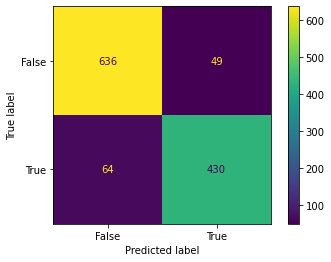

DT training_set: accuracy:0.93, precision:0.938, recall:0.887, f1:0.912
DT test_set: accuracy:0.874, precision:0.871, recall:0.82, f1:0.845
                   precision    recall  f1-score   support

Horror & Suspense       0.88      0.91      0.89       685
     Family Movie       0.87      0.82      0.84       494

         accuracy                           0.87      1179
        macro avg       0.87      0.87      0.87      1179
     weighted avg       0.87      0.87      0.87      1179



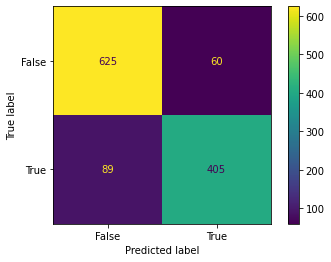

In [881]:
df_list = []
print('For the two hundred information gain dataset')
for name, model in zip(names, models):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    #accuracy
    #train_accuracy = model.score(X_train, y_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    #test_accuracy = model.score(X_test, y_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    #precision
    train_precision = precision_score(y_train, y_train_pred, pos_label="Horror & Suspense")
    test_precision = precision_score(y_test, y_test_pred, pos_label="Horror & Suspense")
    
    #recall
    train_recall = recall_score(y_train, y_train_pred, pos_label="Horror & Suspense")
    test_recall = recall_score(y_test, y_test_pred, pos_label="Horror & Suspense")

    #f1
    train_f1 = f1_score(y_train, y_train_pred, pos_label="Horror & Suspense")
    test_f1 = f1_score(y_test, y_test_pred, pos_label="Horror & Suspense")
    
    print('{} training_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
         .format(name, train_accuracy, train_precision, train_recall, train_f1))
    print('{} test_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
         .format(name, test_accuracy, test_precision, test_recall, test_f1))
    target_names = ['Horror & Suspense', 'Family Movie']
    print(classification_report(y_test, y_test_pred, target_names = target_names))
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

In [882]:
y_test = y_test.to_frame()

In [883]:
y_test['genres'] = y_test['genres'].astype(str)

In [884]:
print(hor_fam_four1['genres'])

0            Family Movie
1            Family Movie
2            Family Movie
3            Family Movie
4       Horror & Suspense
              ...        
5890         Family Movie
5891         Family Movie
5892         Family Movie
5893         Family Movie
5894         Family Movie
Name: genres, Length: 5895, dtype: object


### for the hor_fam_four1

In [885]:
y = hor_fam_four1['genres']                 
X = hor_fam_four1.drop(['genres'], axis=1)

In [886]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [887]:
print(y_test)

4594         Family Movie
2632    Horror & Suspense
3225    Horror & Suspense
2146         Family Movie
5560    Horror & Suspense
              ...        
2565    Horror & Suspense
205     Horror & Suspense
1006         Family Movie
5079         Family Movie
3066         Family Movie
Name: genres, Length: 1179, dtype: object


In [888]:
X_train = minmax_scale(X_train)
X_test = minmax_scale(X_test)

In [889]:
RF = RandomForestClassifier(random_state = 1, max_depth = 46, 
                            max_features=70, min_samples_leaf = 20,
                           n_estimators=50)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=46, max_features=70, min_samples_leaf=20,
                       n_estimators=50, random_state=1)

In [890]:
DT = DecisionTreeClassifier(random_state = 1, max_depth = 32, 
                            max_features=40, min_samples_leaf = 5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=32, max_features=40, min_samples_leaf=5,
                       random_state=1)

In [891]:
models = [RF, DT]
names = ['RF', 'DT']
evaluation = ['accuracy', 'precision', 'recall', 'f1']

For the four hundred information gain dataset
RF training_set: accuracy:0.92, precision:0.919, recall:0.882, f1:0.9
RF test_set: accuracy:0.908, precision:0.91, recall:0.865, f1:0.887
                   precision    recall  f1-score   support

Horror & Suspense       0.91      0.94      0.92       689
     Family Movie       0.91      0.87      0.89       490

         accuracy                           0.91      1179
        macro avg       0.91      0.90      0.90      1179
     weighted avg       0.91      0.91      0.91      1179



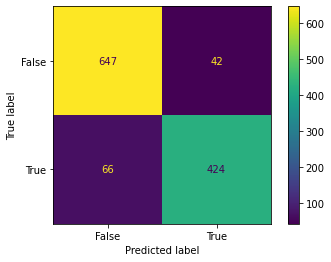

DT training_set: accuracy:0.919, precision:0.924, recall:0.874, f1:0.898
DT test_set: accuracy:0.851, precision:0.838, recall:0.794, f1:0.816
                   precision    recall  f1-score   support

Horror & Suspense       0.86      0.89      0.87       689
     Family Movie       0.84      0.79      0.82       490

         accuracy                           0.85      1179
        macro avg       0.85      0.84      0.85      1179
     weighted avg       0.85      0.85      0.85      1179



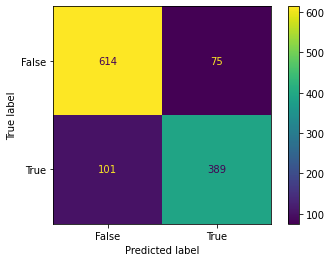

In [892]:
df_list = []
print('For the four hundred information gain dataset')
for name, model in zip(names, models):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    #accuracy
    #train_accuracy = model.score(X_train, y_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    #test_accuracy = model.score(X_test, y_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    #precision
    train_precision = precision_score(y_train, y_train_pred, pos_label="Horror & Suspense")
    test_precision = precision_score(y_test, y_test_pred, pos_label="Horror & Suspense")
    
    #recall
    train_recall = recall_score(y_train, y_train_pred, pos_label="Horror & Suspense")
    test_recall = recall_score(y_test, y_test_pred, pos_label="Horror & Suspense")

    #f1
    train_f1 = f1_score(y_train, y_train_pred, pos_label="Horror & Suspense")
    test_f1 = f1_score(y_test, y_test_pred, pos_label="Horror & Suspense")
    
    print('{} training_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
         .format(name, train_accuracy, train_precision, train_recall, train_f1))
    print('{} test_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
         .format(name, test_accuracy, test_precision, test_recall, test_f1))
    target_names = ['Horror & Suspense', 'Family Movie']
    print(classification_report(y_test, y_test_pred, target_names = target_names))
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

In [893]:
predict_result = DT.predict(X_test)

In [894]:
predict_df = pd.DataFrame()
predict_df['genre'] = predict_result
print(y_test)
#print(predict_df.head(10))
print(predict_result)

4594         Family Movie
2632    Horror & Suspense
3225    Horror & Suspense
2146         Family Movie
5560    Horror & Suspense
              ...        
2565    Horror & Suspense
205     Horror & Suspense
1006         Family Movie
5079         Family Movie
3066         Family Movie
Name: genres, Length: 1179, dtype: object
['Family Movie' 'Horror & Suspense' 'Family Movie' ... 'Family Movie'
 'Family Movie' 'Family Movie']


In [895]:
hor_fam_two[hor_fam_two['rotten_tomatoes_link'] == 'm/living_in_oblivion']

remove_duplicate_words,rotten_tomatoes_link,adorable,adults,amiable,amusing,animated,animation,antics,appealing,atmosphere,atmospheric,b,bittersweet,blood,bloody,breezy,bright,broad,brutal,campy,charm,charmer,charming,charms,chemistry,children,children's,chiller,chilling,chills,climax,comedic,comedies,comedy,comic,compelling,creepy,crime,cute,dark,delight,delightful,disney,disturbing,dramedy,dread,eerie,effective,effects,efficient,endearing,engrossing,evil,exercise,exploitation,family,farce,fear,friendship,fright,frightening,frights,funnier,funniest,funny,gag,gags,genre,gentle,gore,gory,gothic,gripping,grisly,gruesome,guessing,happy,harmless,harrowing,haunted,haunting,hearted,heartfelt,heartwarming,hilarious,hitchcock,hitchcockian,holes,horrific,horrifying,horror,horrors,humor,intense,intensity,intrigue,intriguing,joke,jokes,jolts,joy,jump,kids,killer,killing,laugh,laughable,laughs,lessons,light,likable,likeable,love,lovely,lurid,macabre,menace,monster,moody,murder,murky,mystery,nail,natured,nightmare,noir,paranoia,pleasant,poignant,psycho,psychological,pulp,pulpy,puzzle,raunchy,revenge,riveting,rom,romance,romantic,romcom,saccharine,scare,scares,scariest,scary,schlock,screwball,seat,sentiment,sentimental,sentimentality,shocker,shocks,sinister,sitcom,slapstick,slasher,smile,songs,spirited,spooky,stylish,supernatural,suspense,suspenseful,sweet,sweetly,sweetness,taut,tender,tense,tension,terrifying,terror,thrill,thriller,thrillers,thrilling,thrills,touching,twist,twists,twisty,unfunny,unnerving,unsettling,uplifting,victims,violence,violent,visceral,warm,warmth,whimsical,whimsy,whodunit,winning,wit,witty,wonderful,genres,index1
3225,m/living_in_oblivion,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Family Movie,3225


## For predicting audience rating
### two hundred information gain for predicting audience ratings

In [977]:
print(movie1.head())
mapping = dict(word_frequency[['words', 'has_freq']].values)
word_frequency_genres['has_freq'] = word_frequency_genres.remove_duplicate_words.map(mapping)

                    rotten_tomatoes_link                                        movie_title                                  critics_consensus                                             genres  tomatometer_rating  audience_rating tomato_binary_rating audience_binary_rating
0                              m/0814255  Percy Jackson & the Olympians: The Lightning T...  Though it may seem like just another Harry Pot...  Action & Adventure, Comedy, Drama, Science Fic...                49.0             53.0                    0                      0
1                              m/0878835                                        Please Give  Nicole Holofcener's newest might seem slight i...                                             Comedy                87.0             64.0                    1                      1
2                                   m/10                                                 10  Blake Edwards' bawdy comedy may not score a pe...                                 

In [978]:
#print(hor_fam_four.head())

mapping_torating = dict(movie1[['rotten_tomatoes_link', 'tomato_binary_rating']].values)
hor_fam_two['tomato_binary_rating'] = hor_fam_two.rotten_tomatoes_link.map(mapping_torating)
mapping_aurating = dict(movie1[['rotten_tomatoes_link', 'audience_binary_rating']].values)
hor_fam_two['audience_binary_rating'] = hor_fam_two.rotten_tomatoes_link.map(mapping_aurating)
#print(hor_fam_two1.head())

In [979]:
mapping_torating = dict(movie1[['rotten_tomatoes_link', 'tomato_binary_rating']].values)
hor_fam_four['tomato_binary_rating'] = hor_fam_four.rotten_tomatoes_link.map(mapping_torating)
mapping_aurating = dict(movie1[['rotten_tomatoes_link', 'audience_binary_rating']].values)
hor_fam_four['audience_binary_rating'] = hor_fam_four.rotten_tomatoes_link.map(mapping_aurating)
print(hor_fam_four.head())

remove_duplicate_words                   rotten_tomatoes_link  absorbing  action  actioner  adorable  adrenaline  adult  adults  affable  affection  affirming  age  ages  agreeable  aimed  alfred  ambiguity  amiable  amusing  animated  animation  antics  apocalyptic  appeal  appealing  atmosphere  atmospheric  atmospherics    b  bang  biter  bittersweet  blood  bloodbath  bloodshed  bloody  bourne  breezy  bright  broad  brooding  brutal  brutality  budget  build  building  builds  burn  camp  campy  carnage  cartoon  charm  charmer  charming  charms  chemistry  chick  children  children's  chiller  chilling  chillingly  chills  chuckle  chuckles  claustrophobic  climax  cloying  cold  com  comedian  comedic  comedies  comedy  comic  compelling  conspiracy  convoluted  crass  creep  creepiness  creepy  crime  crude  cult  cute  cuteness  cutesy  dancing  dark  deaths  delight  delightful  demon  demonic  detective  disney  disney's  disturbing  dramedy  dread  editing  eerie  \
0      

In [980]:
hor_fam_two2 = hor_fam_two.copy()
hor_fam_two2 = hor_fam_two2.drop(['rotten_tomatoes_link', 'genres'], axis=1)
hor_fam_four2 = hor_fam_four.copy()
hor_fam_four2 = hor_fam_four2.drop(['rotten_tomatoes_link', 'genres'], axis=1)

In [981]:
y = hor_fam_two2['audience_binary_rating']                 
X = hor_fam_two2.drop(['audience_binary_rating'], axis=1)

In [982]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [983]:
X_train = minmax_scale(X_train)
X_test = minmax_scale(X_test)

In [984]:
from sklearn.model_selection import RandomizedSearchCV

In [985]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint


In [986]:
RF = RandomForestClassifier(random_state = 1, max_depth = 46, 
                            max_features=70, min_samples_leaf = 20,
                           n_estimators=50)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=46, max_features=70, min_samples_leaf=20,
                       n_estimators=50, random_state=1)

In [987]:
hyper_params = {'max_depth': range(3, 50),
                'max_features': range(3, 50),
                'min_samples_leaf': range(20, 400, 50)
                }

In [988]:
DT = DecisionTreeClassifier(random_state = 1, max_depth = 32, 
                            max_features=40, min_samples_leaf = 5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=32, max_features=40, min_samples_leaf=5,
                       random_state=1)

In [989]:
models = [DT, RF]
names = ['DT', 'RF']
evaluation = ['accuracy', 'precision', 'recall', 'f1']

In [990]:
from sklearn.metrics import confusion_matrix

The two hundred information gain dataset predicts the audience ratings
DT training_set: accuracy:0.845, precision:0.859, recall:0.833, f1:0.846
DT test_set: accuracy:0.683, precision:0.695, recall:0.677, f1:0.686
                   precision    recall  f1-score   support

Horror & Suspense       0.67      0.69      0.68       576
     Family Movie       0.70      0.68      0.69       603

         accuracy                           0.68      1179
        macro avg       0.68      0.68      0.68      1179
     weighted avg       0.68      0.68      0.68      1179



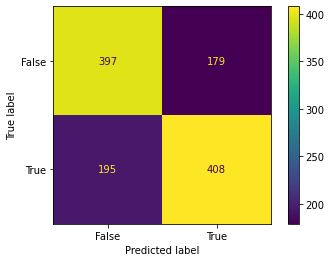

RF training_set: accuracy:0.787, precision:0.79, recall:0.793, f1:0.791
RF test_set: accuracy:0.776, precision:0.777, recall:0.789, f1:0.783
                   precision    recall  f1-score   support

Horror & Suspense       0.78      0.76      0.77       576
     Family Movie       0.78      0.79      0.78       603

         accuracy                           0.78      1179
        macro avg       0.78      0.78      0.78      1179
     weighted avg       0.78      0.78      0.78      1179



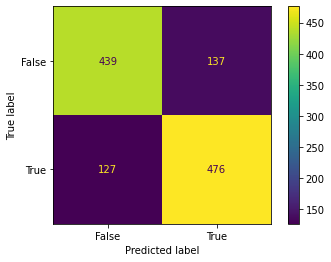

In [991]:
df_list = []
print('The two hundred information gain dataset predicts the audience ratings')
for name, model in zip(names, models):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    #accuracy
    #train_accuracy = model.score(X_train, y_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    #test_accuracy = model.score(X_test, y_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    #precision
    train_precision = precision_score(y_train, y_train_pred, pos_label='1')
    test_precision = precision_score(y_test, y_test_pred, pos_label='1')
    
    #recall
    train_recall = recall_score(y_train, y_train_pred, pos_label='1')
    test_recall = recall_score(y_test, y_test_pred, pos_label='1')

    #f1
    train_f1 = f1_score(y_train, y_train_pred, pos_label='1')
    test_f1 = f1_score(y_test, y_test_pred, pos_label='1')
    
    print('{} training_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
         .format(name, train_accuracy, train_precision, train_recall, train_f1))
    print('{} test_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
         .format(name, test_accuracy, test_precision, test_recall, test_f1))
    target_names = ['Horror & Suspense', 'Family Movie']
    print(classification_report(y_test, y_test_pred, target_names = target_names))
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

In [992]:
from xgboost import XGBClassifier
import xgboost as xgb

In [993]:
xgbc = XGBClassifier()

In [994]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify = y)

In [995]:
y_train = y_train.astype(int)
X_train = X_train.astype(int)
y_test = y_test.astype(int)
X_test = X_test.astype(int)

In [996]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [997]:
train_data = xgb.DMatrix(X_train, y_train)
test_data = xgb.DMatrix(X_test,y_test)

#set parameters
params = {'objective':'multi:softmax','num_class':3,'booster':'gbtree','max_depth':5, 'eta':0.1, 'subsample':0.7, 'colsample_bytree':0.7}

#training
num_round=50
watchlist = [(train_data,'train'), (test_data,'test')]  
model = xgb.train(params, train_data, num_round, watchlist)

#predict
pred = model.predict(test_data)
print(pred)

#error rate
error_rate=np.sum(pred!=y_test)/y_test.shape[0]
print(error_rate)


[0]	train-mlogloss:1.02446	test-mlogloss:1.02928
[1]	train-mlogloss:0.96111	test-mlogloss:0.96927
[2]	train-mlogloss:0.91415	test-mlogloss:0.92634
[3]	train-mlogloss:0.87257	test-mlogloss:0.88860
[4]	train-mlogloss:0.83045	test-mlogloss:0.84921
[5]	train-mlogloss:0.79874	test-mlogloss:0.82035
[6]	train-mlogloss:0.76915	test-mlogloss:0.79417


/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[7]	train-mlogloss:0.74195	test-mlogloss:0.77066
[8]	train-mlogloss:0.71415	test-mlogloss:0.74519
[9]	train-mlogloss:0.69003	test-mlogloss:0.72353
[10]	train-mlogloss:0.67066	test-mlogloss:0.70686
[11]	train-mlogloss:0.65056	test-mlogloss:0.68961
[12]	train-mlogloss:0.63455	test-mlogloss:0.67541
[13]	train-mlogloss:0.62086	test-mlogloss:0.66343
[14]	train-mlogloss:0.60515	test-mlogloss:0.65074
[15]	train-mlogloss:0.59075	test-mlogloss:0.63848
[16]	train-mlogloss:0.57813	test-mlogloss:0.62855
[17]	train-mlogloss:0.56667	test-mlogloss:0.62010
[18]	train-mlogloss:0.55662	test-mlogloss:0.61225
[19]	train-mlogloss:0.54647	test-mlogloss:0.60413
[20]	train-mlogloss:0.53828	test-mlogloss:0.59816
[21]	train-mlogloss:0.53007	test-mlogloss:0.59183
[22]	train-mlogloss:0.52233	test-mlogloss:0.58643
[23]	train-mlogloss:0.51459	test-mlogloss:0.58059
[24]	train-mlogloss:0.50812	test-mlogloss:0.57582
[25]	train-mlogloss:0.50170	test-mlogloss:0.57111
[26]	train-mlogloss:0.49532	test-mlogloss:0.56667
[27

The two hundred information gain dataset predicts the audience ratings
xgbc training_set: accuracy:0.979, precision:0.98, recall:0.98, f1:0.98
xgbc test_set: accuracy:0.754, precision:0.749, recall:0.779, f1:0.764
                 precision    recall  f1-score   support

Audience_rating       0.76      0.73      0.74       577
  Tomato_rating       0.75      0.78      0.76       602

       accuracy                           0.75      1179
      macro avg       0.75      0.75      0.75      1179
   weighted avg       0.75      0.75      0.75      1179



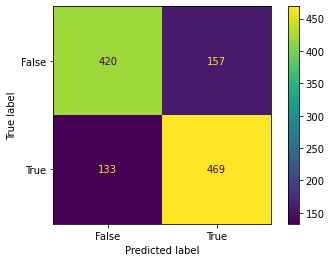

In [998]:
print('The two hundred information gain dataset predicts the audience ratings')
y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)
    
    
#accuracy
#train_accuracy = model.score(X_train, y_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
#test_accuracy = model.score(X_test, y_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
    
#precision
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
    
#recall
train_recall = recall_score(y_train, y_train_pred, pos_label=1)
test_recall = recall_score(y_test, y_test_pred, pos_label=1)

#f1
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)
    
print('{} training_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
    .format('xgbc', train_accuracy, train_precision, train_recall, train_f1))
print('{} test_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
    .format('xgbc', test_accuracy, test_precision, test_recall, test_f1))
target_names = ['Audience_rating', 'Tomato_rating']
print(classification_report(y_test, y_test_pred, target_names = target_names))
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [999]:
from sklearn.linear_model import LogisticRegression

In [1000]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

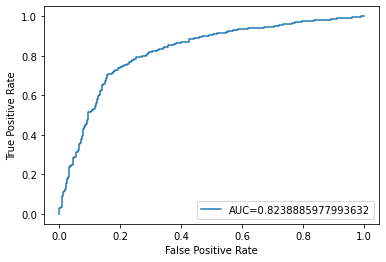

In [1001]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Four hundred information gain for predicting audience ratings

In [1002]:
y = hor_fam_four2['audience_binary_rating']                 
X = hor_fam_four2.drop(['audience_binary_rating'], axis=1)

In [1003]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

In [1004]:
X_train = minmax_scale(X_train)
X_test = minmax_scale(X_test)

In [1005]:
RF = RandomForestClassifier(random_state = 1, max_depth = 46, 
                            max_features=70, min_samples_leaf = 20,
                           n_estimators=50)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=46, max_features=70, min_samples_leaf=20,
                       n_estimators=50, random_state=1)

In [1006]:
hyper_params = {'max_depth': range(3, 50),
                'max_features': range(3, 50),
                'min_samples_leaf': range(20, 400, 50)
                }

In [1007]:
DT = DecisionTreeClassifier(random_state = 1, max_depth = 32, 
                            max_features=40, min_samples_leaf = 5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=32, max_features=40, min_samples_leaf=5,
                       random_state=1)

In [1008]:
models = [DT, RF]
names = ['DT', 'RF']
evaluation = ['accuracy', 'precision', 'recall', 'f1']

In [1009]:
from sklearn.metrics import confusion_matrix

The four hundred information gain dataset predicts the audience ratings
DT training_set: accuracy:0.834, precision:0.855, recall:0.811, f1:0.832
DT test_set: accuracy:0.693, precision:0.729, recall:0.645, f1:0.685
                   precision    recall  f1-score   support

Horror & Suspense       0.66      0.74      0.70       570
     Family Movie       0.73      0.65      0.68       609

         accuracy                           0.69      1179
        macro avg       0.70      0.69      0.69      1179
     weighted avg       0.70      0.69      0.69      1179



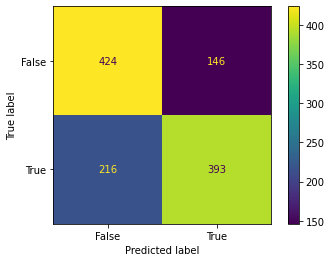

RF training_set: accuracy:0.787, precision:0.787, recall:0.797, f1:0.792
RF test_set: accuracy:0.803, precision:0.813, recall:0.805, f1:0.809
                   precision    recall  f1-score   support

Horror & Suspense       0.79      0.80      0.80       570
     Family Movie       0.81      0.80      0.81       609

         accuracy                           0.80      1179
        macro avg       0.80      0.80      0.80      1179
     weighted avg       0.80      0.80      0.80      1179



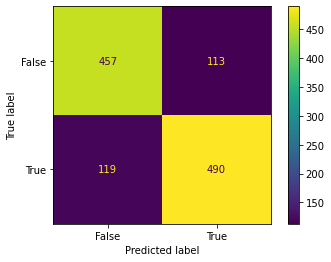

In [1010]:
df_list = []
print('The four hundred information gain dataset predicts the audience ratings')
for name, model in zip(names, models):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    #accuracy
    #train_accuracy = model.score(X_train, y_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    #test_accuracy = model.score(X_test, y_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    #precision
    train_precision = precision_score(y_train, y_train_pred, pos_label='1')
    test_precision = precision_score(y_test, y_test_pred, pos_label='1')
    
    #recall
    train_recall = recall_score(y_train, y_train_pred, pos_label='1')
    test_recall = recall_score(y_test, y_test_pred, pos_label='1')

    #f1
    train_f1 = f1_score(y_train, y_train_pred, pos_label='1')
    test_f1 = f1_score(y_test, y_test_pred, pos_label='1')
    
    print('{} training_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
         .format(name, train_accuracy, train_precision, train_recall, train_f1))
    print('{} test_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
         .format(name, test_accuracy, test_precision, test_recall, test_f1))
    target_names = ['Horror & Suspense', 'Family Movie']
    print(classification_report(y_test, y_test_pred, target_names = target_names))
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()

In [1058]:
xgbc = XGBClassifier()

In [1059]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify = y)
y_train = y_train.astype(int)
X_train = X_train.astype(int)
y_test = y_test.astype(int)
X_test = X_test.astype(int)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

The four hundred information gain dataset predicts the audience ratings
xgbc training_set: accuracy:0.982, precision:0.984, recall:0.981, f1:0.982
xgbc test_set: accuracy:0.774, precision:0.771, recall:0.792, f1:0.782
                 precision    recall  f1-score   support

Audience_rating       0.78      0.76      0.77       578
  Tomato_rating       0.77      0.79      0.78       601

       accuracy                           0.77      1179
      macro avg       0.77      0.77      0.77      1179
   weighted avg       0.77      0.77      0.77      1179



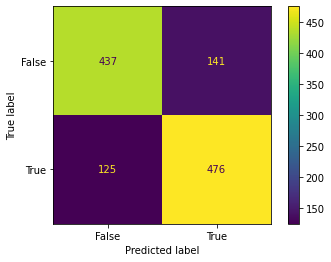

In [1060]:
print('The four hundred information gain dataset predicts the audience ratings')
y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)
    
    
#accuracy
#train_accuracy = model.score(X_train, y_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
#test_accuracy = model.score(X_test, y_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
    
#precision
train_precision = precision_score(y_train, y_train_pred, pos_label=1)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)
    
#recall
train_recall = recall_score(y_train, y_train_pred, pos_label=1)
test_recall = recall_score(y_test, y_test_pred, pos_label=1)

#f1
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)
    
print('{} training_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
    .format('xgbc', train_accuracy, train_precision, train_recall, train_f1))
print('{} test_set: accuracy:{:.3}, precision:{:.3}, recall:{:.3}, f1:{:.3}'
    .format('xgbc', test_accuracy, test_precision, test_recall, test_f1))
target_names = ['Audience_rating', 'Tomato_rating']
print(classification_report(y_test, y_test_pred, target_names = target_names))
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [1061]:
from sklearn.linear_model import LogisticRegression

In [971]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

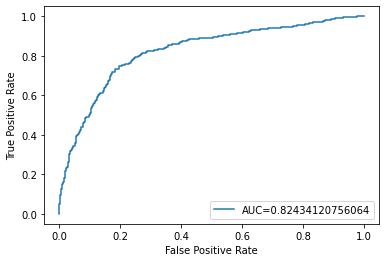

In [973]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()